## Project

1) How will your ability to work from home affect your mental fatigue?
* H1: The regression line for both groups will not have the same slope.
* H0: The regression line for both groups will have the same slope.

2) Does Designation affect Mental fatigue?
* H1: The regression line for the groups will not have the same slope.
* H0: The regression line for the groups will have the same slope.


### Approach
1)Mean
2)Variance
3) Conclusion and t-test

4)Mean
5)Variance
6) Conclusion and t-test

7) Eventuall comparisons.


In [3]:
%matplotlib inline
# Importing pandas
import pandas as pd
#Importing Matplotlib
import matplotlib.pyplot as mpl
#Importing Numpy
import numpy as np
#Importing Scipy
import scipy.stats as scp

In [4]:
df = pd.read_csv("test.csv", sep=",")

In [5]:
no_wfh = df.loc[df['WFH Setup Available']=='No']
print(no_wfh['Mental Fatigue Score'].mean())
print(len(no_wfh))
print(scp.variation(no_wfh['Mental Fatigue Score']))

6.318745545260158
5612
0.29170589004926145


In [6]:
yes_wfh = df.loc[df['WFH Setup Available']=='Yes']
print(yes_wfh['Mental Fatigue Score'].mean())
print(len(yes_wfh))
print(scp.variation(yes_wfh['Mental Fatigue Score']))

5.214853871648086
6638
0.3499225034516358


In [7]:
scp.ttest_ind(yes_wfh['Mental Fatigue Score'],no_wfh['Mental Fatigue Score'], equal_var = False)

Ttest_indResult(statistic=-33.17502811400056, pvalue=7.069391669737409e-231)

In [8]:

print(no_wfh[['WFH Setup Available','Mental Fatigue Score', 'Resource Allocation']])

      WFH Setup Available  Mental Fatigue Score  Resource Allocation
0                      No                   7.7                  5.0
3                      No                   4.6                  6.0
4                      No                   6.4                  5.0
5                      No                   6.5                  5.0
7                      No                   8.5                  5.0
...                   ...                   ...                  ...
12232                  No                   4.8                  5.0
12235                  No                   3.4                  1.0
12247                  No                   9.6                  7.0
12248                  No                   6.7                  6.0
12249                  No                   2.0                  2.0

[5612 rows x 3 columns]


In [9]:
z = no_wfh.sort_values(by = ['Resource Allocation'])
values_no = []
for i in range(1,11):
    values_no.append(round( no_wfh['Mental Fatigue Score'].loc[no_wfh['Resource Allocation'] == i].mean(),2))
values_no

    

[2.49, 4.05, 4.76, 5.79, 6.54, 7.02, 7.58, 8.12, 8.72, 9.3]

In [10]:
values_yes = []
for i in range(1,11):
    values_yes.append(round( yes_wfh['Mental Fatigue Score'].loc[yes_wfh['Resource Allocation'] == i].mean(),2))
values_yes


[2.51, 4.04, 4.76, 5.39, 5.93, 6.61, 7.58, 7.97, 8.69, 9.28]

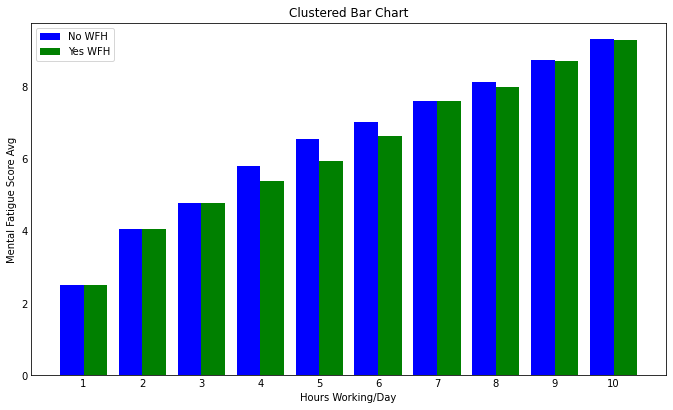

In [11]:
mpl.style.use('_mpl-gallery')

# make data

x_labels = [i for i in range(1,11)]
data_y1 = values_no
data_y2 = values_yes


#Creating a range for the X axis
data_x = np.arange(len(x_labels))
#setting a bar width
width = 0.4
fig = mpl.figure(figsize=(9,5))
ax = fig.add_subplot()
ax.bar(data_x - width/2, data_y1, width, label='No WFH', color="Blue")
ax.bar(data_x + width/2, data_y2, width, label='Yes WFH', color="Green")
ax.set_xlabel('Hours Working/Day')
ax.set_ylabel('Mental Fatigue Score Avg')
ax.set_title('Clustered Bar Chart')
ax.set_xticks(data_x, x_labels)

rects = ax.patches

ax.grid()
ax.legend()


[0.72078848 2.64185095]


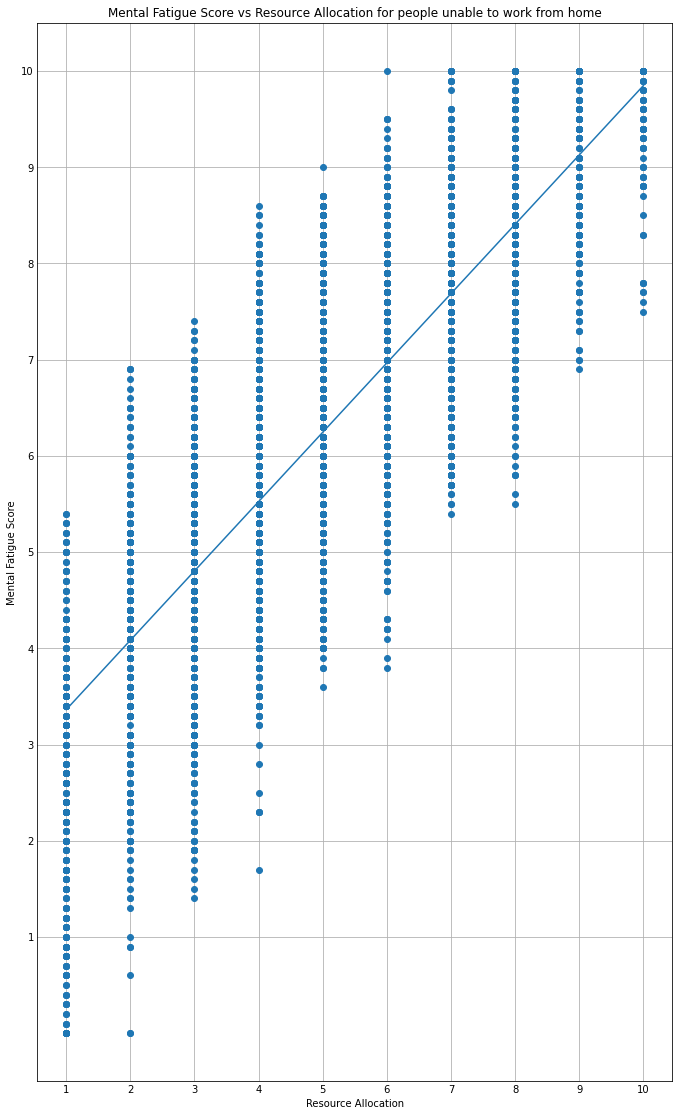

In [31]:
y = no_wfh['Mental Fatigue Score']
x = no_wfh['Resource Allocation']
b = scp.linregress(x,y)
data_linreg = np.polyfit(x,y,1)

xp = np.linspace(1,10, 156)
lr = np.polyval(data_linreg, xp)
print(data_linreg)
fig = mpl.figure(figsize=(9,15))
ax = fig.add_subplot()
ax.grid()
#ax.set_yticks(h.Score)
ax.set_xlabel('Resource Allocation')
ax.set_ylabel('Mental Fatigue Score')
ax.set_title('Mental Fatigue Score vs Resource Allocation for people unable to work from home')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.grid()
ax.scatter(x, y)
ax.plot(xp,lr)

6638 6638


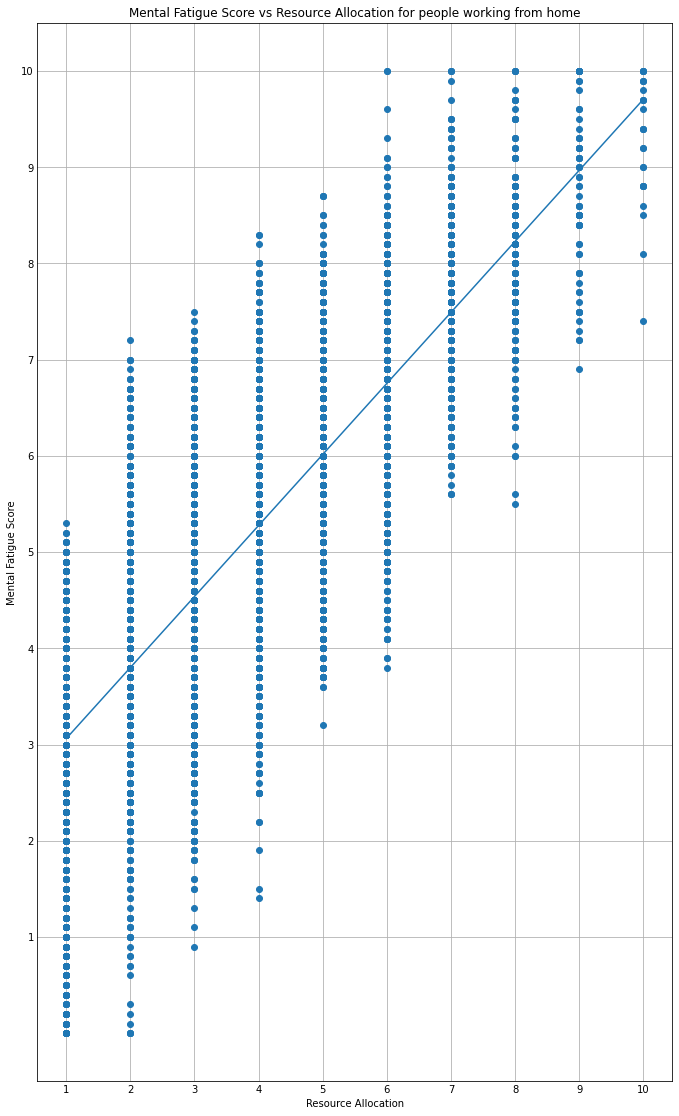

In [32]:
y = yes_wfh['Mental Fatigue Score']
x = yes_wfh['Resource Allocation']
k = scp.linregress(x,y)
z = yes_wfh.loc[yes_wfh['Resource Allocation']==1]
data_linreg = np.polyfit(x,y,1)

xp = np.linspace(1,10, 156)
lr = np.polyval(data_linreg, xp)

print(len(x),len(y))

fig = mpl.figure(figsize=(9,15))
ax = fig.add_subplot()
ax.grid()
#ax.set_yticks(h.Score)
ax.set_xlabel('Resource Allocation')
ax.set_ylabel('Mental Fatigue Score')
ax.set_title('Mental Fatigue Score vs Resource Allocation for people working from home')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.grid()
ax.scatter(x, y)
ax.plot(xp,lr)
#ax.boxplot(y)

In [37]:
scp.mannwhitneyu(b,k)

MannwhitneyuResult(statistic=12.5, pvalue=1.0)

In [25]:
#first plot
df_des1 = df.loc[df["Designation"] == 1]
x1 = df_des1["Resource Allocation"]
y1 = df_des1["Mental Fatigue Score"]
print(scp.linregress(x1,y1))

#second plot
df_des2 = df.loc[df["Designation"] == 2]
x2 = df_des2["Resource Allocation"]
y2 = df_des2["Mental Fatigue Score"]
print(scp.linregress(x2,y2))

#third plot
df_des3 = df.loc[df["Designation"] == 3]
x3 = df_des3["Resource Allocation"]
y3 = df_des3["Mental Fatigue Score"]

#forth plot
df_des4 = df.loc[df["Designation"] == 4]
x4= df_des4["Resource Allocation"]
y4= df_des4["Mental Fatigue Score"]

#fifth plot
df_des5 = df.loc[df["Designation"] == 5]
x5= df_des5["Resource Allocation"]
y5= df_des5["Mental Fatigue Score"]

LinregressResult(slope=0.9201150374421141, intercept=2.1043745495837807, rvalue=0.5695067010959632, pvalue=2.821681935044366e-222, stderr=0.026125332119152897, intercept_stderr=0.07196648010736763)
LinregressResult(slope=0.8806808144887621, intercept=1.9593922041142289, rvalue=0.6321129384646885, pvalue=0.0, stderr=0.01692020674359169, intercept_stderr=0.07240885415760015)


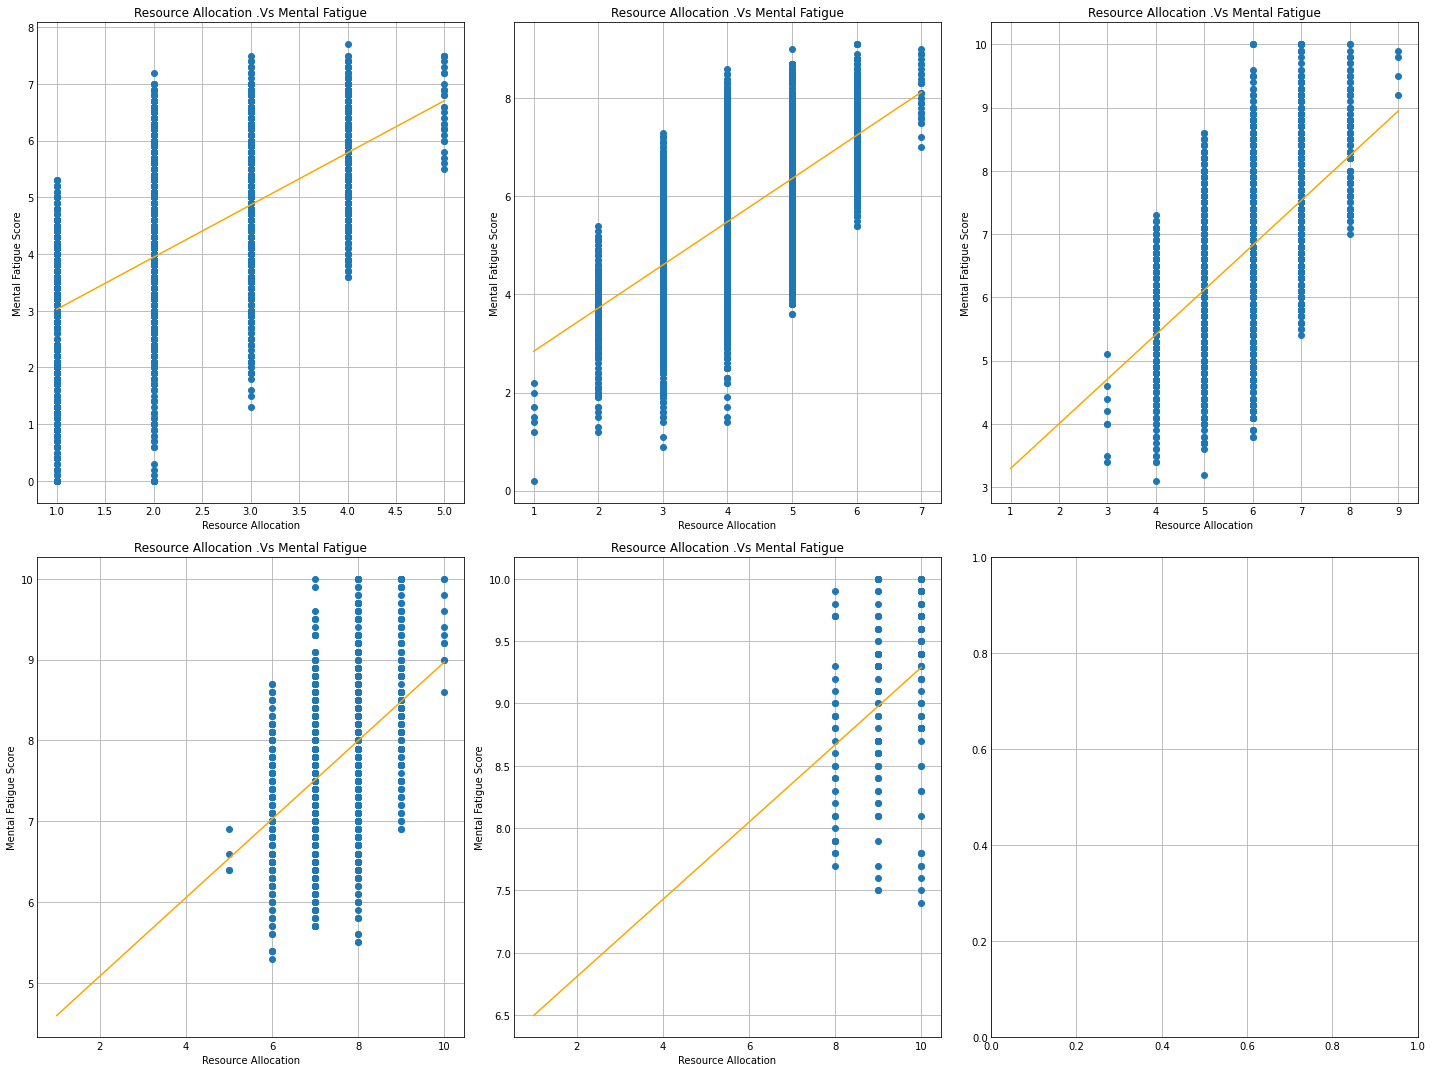

In [20]:
fig = mpl.figure(figsize=(20,15)) 
ax = fig.subplots(nrows=2, ncols=3) 


#Designation of 1
fig.tight_layout() 
ax[0,0].grid() 
ax[0,0].set_xlabel('Resource Allocation') 
ax[0,0].set_ylabel('Mental Fatigue Score') 
ax[0,0].set_title('Resource Allocation .Vs Mental Fatigue') 
ax[0,0].grid()
data_linreg = np.polyfit(x1,y1,1)
xp = np.linspace(1,5, 156)
lr = np.polyval(data_linreg, xp)
ax[0,0].plot(xp,lr, color="Orange")
ax[0,0].scatter(x1,y1)



#Designation of 2
fig.tight_layout() 
ax[0,1].grid() 
ax[0,1].set_xlabel('Resource Allocation') 
ax[0,1].set_ylabel('Mental Fatigue Score') 
ax[0,1].set_title('Resource Allocation .Vs Mental Fatigue') 
ax[0,1].grid()
data_linreg = np.polyfit(x2,y2,1)
xp = np.linspace(1,7, 156)
lr = np.polyval(data_linreg, xp)
ax[0,1].plot(xp,lr, color="Orange")
ax[0,1].scatter(x2,y2) 


#Designation of 3
fig.tight_layout() 
ax[0,2].grid() 
ax[0,2].set_xlabel('Resource Allocation') 
ax[0,2].set_ylabel('Mental Fatigue Score') 
ax[0,2].set_title('Resource Allocation .Vs Mental Fatigue') 
ax[0,2].grid()
data_linreg = np.polyfit(x3,y3,1)
xp = np.linspace(1,9, 156)
lr = np.polyval(data_linreg, xp)
ax[0,2].plot(xp,lr, color="Orange")
ax[0,2].scatter(x3,y3) 



#Designation of 4
fig.tight_layout() 
ax[1,0].grid() 
ax[1,0].set_xlabel('Resource Allocation') 
ax[1,0].set_ylabel('Mental Fatigue Score') 
ax[1,0].set_title('Resource Allocation .Vs Mental Fatigue') 
ax[1,0].grid()
data_linreg = np.polyfit(x4,y4,1)
xp = np.linspace(1,10, 156)
lr = np.polyval(data_linreg, xp)
ax[1,0].plot(xp,lr, color="Orange")
ax[1,0].scatter(x4,y4) 


#Designation of 5
fig.tight_layout() 
ax[1,1].grid() 
ax[1,1].set_xlabel('Resource Allocation') 
ax[1,1].set_ylabel('Mental Fatigue Score') 
ax[1,1].set_title('Resource Allocation .Vs Mental Fatigue') 
ax[1,1].grid()
data_linreg = np.polyfit(x5,y5,1)
xp = np.linspace(1,10, 156)
lr = np.polyval(data_linreg, xp)
ax[1,1].plot(xp,lr, color="Orange")
ax[1,1].scatter(x5,y5) 



fig.tight_layout() 

0.9207916729371652


ValueError: x and y must have the same length.